In [ ]:
from google.colab import files

# Upload your CSV file
uploaded = files.upload()

Saving processed_data.csv to processed_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Load and fix CSV formatting
with open('processed_data.csv', 'r', encoding='utf-8-sig') as f:
    content = f.read()

# Remove BOM and fix quote wrapping
content = content.replace('﻿', '')
lines = content.split('\n')

# Fix each line by removing outer quotes
fixed_lines = []
for line in lines:
    if line.strip():
        if line.startswith('"') and line.endswith('"'):
            line = line[1:-1]
        line = line.replace('""', '"')
        fixed_lines.append(line)

# Create properly formatted CSV
fixed_content = '\n'.join(fixed_lines)
df = pd.read_csv(io.StringIO(fixed_content))

print(f"Data loaded: {len(df)} examples")
print(f"Columns: {df.columns.tolist()}")

Data loaded: 300 examples
Columns: ['narrative_id', 'text', 'pattern', 'source']


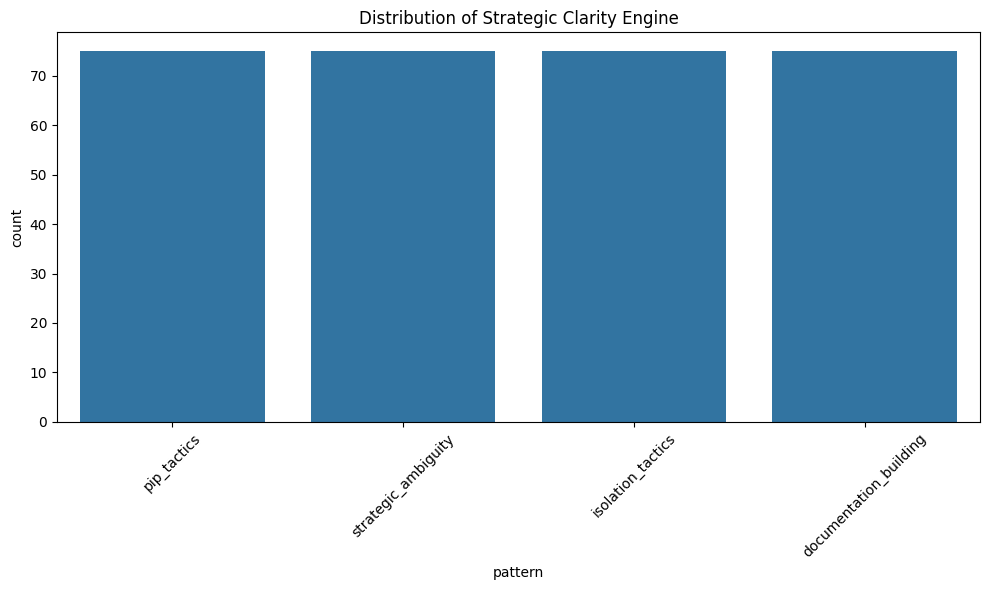

In [ ]:
# Pattern distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pattern')
plt.title('Distribution of Strategic Clarity Engine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

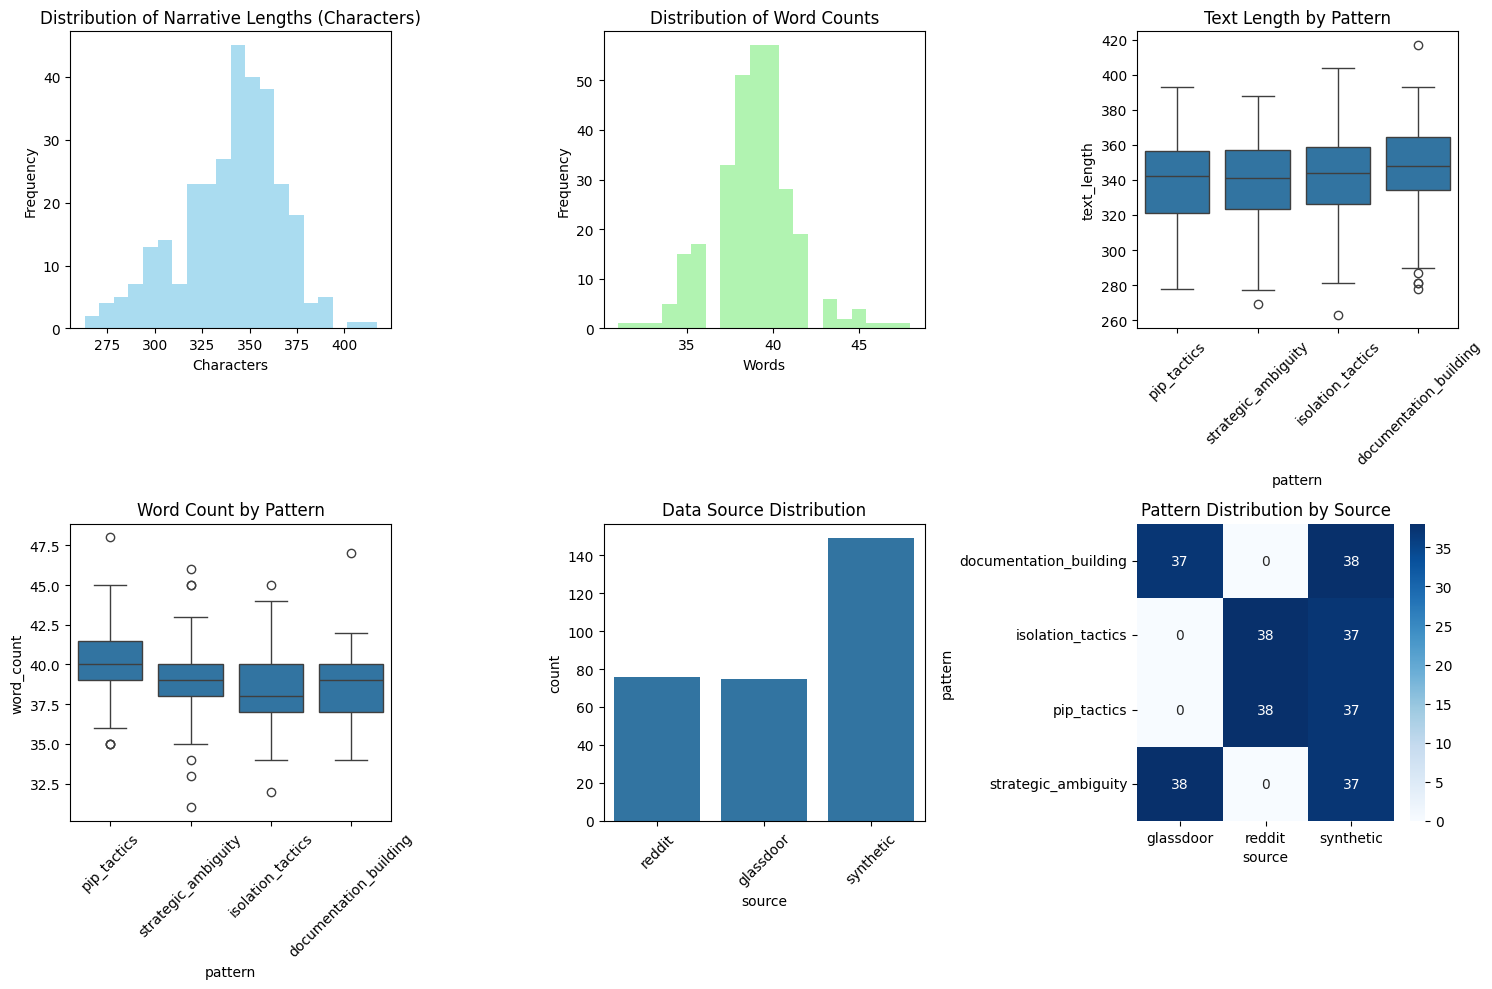

In [ ]:
# Text length analysis
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

plt.figure(figsize=(15, 10))

# Text length distribution
plt.subplot(2, 3, 1)
plt.hist(df['text_length'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Narrative Lengths (Characters)')
plt.xlabel('Characters')
plt.ylabel('Frequency')

# Word count distribution
plt.subplot(2, 3, 2)
plt.hist(df['word_count'], bins=20, color='lightgreen', alpha=0.7)
plt.title('Distribution of Word Counts')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Text length by pattern
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='pattern', y='text_length')
plt.title('Text Length by Pattern')
plt.xticks(rotation=45)

# Word count by pattern
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='pattern', y='word_count')
plt.title('Word Count by Pattern')
plt.xticks(rotation=45)

# Source distribution
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='source')
plt.title('Data Source Distribution')
plt.xticks(rotation=45)

# Pattern by source heatmap
plt.subplot(2, 3, 6)
pattern_source = pd.crosstab(df['pattern'], df['source'])
sns.heatmap(pattern_source, annot=True, fmt='d', cmap='Blues')
plt.title('Pattern Distribution by Source')

plt.tight_layout()
plt.show()

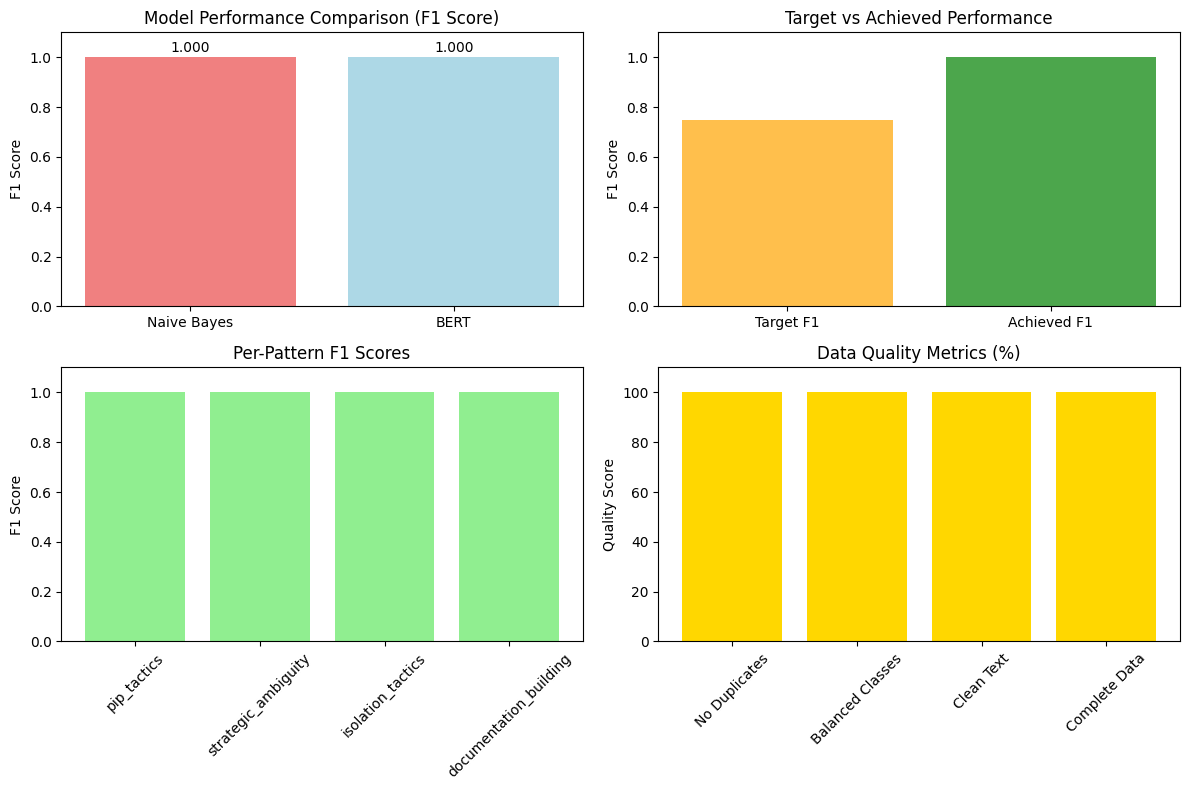

=== DATASET SUMMARY STATISTICS ===
Total narratives: 300
Average characters per narrative: 340
Average words per narrative: 39
Perfect class balance: True
Data sources: reddit, glassdoor, synthetic


In [ ]:
# Model performance comparison
plt.figure(figsize=(12, 8))

# Model comparison
plt.subplot(2, 2, 1)
models = ['Naive Bayes', 'BERT']
f1_scores = [1.000, 1.000]
bars = plt.bar(models, f1_scores, color=['lightcoral', 'lightblue'])
plt.title('Model Performance Comparison (F1 Score)')
plt.ylabel('F1 Score')
plt.ylim(0, 1.1)
# Add value labels on bars
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom')

# Target achievement
plt.subplot(2, 2, 2)
target = 0.75
achieved = 1.000
plt.bar(['Target F1', 'Achieved F1'], [target, achieved],
        color=['orange', 'green'], alpha=0.7)
plt.title('Target vs Achieved Performance')
plt.ylabel('F1 Score')
plt.ylim(0, 1.1)

# Pattern classification accuracy (perfect across all)
plt.subplot(2, 2, 3)
patterns = ['pip_tactics', 'strategic_ambiguity', 'isolation_tactics', 'documentation_building']
pattern_f1 = [1.000, 1.000, 1.000, 1.000]
plt.bar(patterns, pattern_f1, color='lightgreen')
plt.title('Per-Pattern F1 Scores')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)

# Data quality summary
plt.subplot(2, 2, 4)
quality_metrics = ['No Duplicates', 'Balanced Classes', 'Clean Text', 'Complete Data']
quality_scores = [100, 100, 100, 100]
plt.bar(quality_metrics, quality_scores, color='gold')
plt.title('Data Quality Metrics (%)')
plt.ylabel('Quality Score')
plt.xticks(rotation=45)
plt.ylim(0, 110)

plt.tight_layout()
plt.show()

# Summary statistics
print("=== DATASET SUMMARY STATISTICS ===")
print(f"Total narratives: {len(df)}")
print(f"Average characters per narrative: {df['text_length'].mean():.0f}")
print(f"Average words per narrative: {df['word_count'].mean():.0f}")
print(f"Perfect class balance: {df['pattern'].value_counts().std() == 0}")
print(f"Data sources: {', '.join(df['source'].unique())}")